<a href="https://colab.research.google.com/github/ShripadJagtap/LGMVIP-DataScience/blob/main/LGMVIP_TASK8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME: SHRIPAD JAGTAP**


**DATA SCIENCE INTERN AT LETSGROWMORE LGMVIPDECEMBER**



**ADVANCED LEVEL TASK 2 : Next Word Prediction**



> 



***STEP 1: IMPORT ALL THE REQUIRED PYTHON LIBRARIES***

In [ ]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [ ]:
text = open('1661-0.txt' ,encoding ='UTF-8').read().lower()
print('corpus length:', len(text))

corpus length: 581888


In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

In [ ]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [ ]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


In [ ]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [ ]:
print(X[0][0])

[False False False ... False False False]


In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [ ]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=10, shuffle=True).history

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
811/811 [==============================] - 281s 339ms/step - loss: 6.0093 - accuracy: 0.1072 - val_loss: 7.1096 - val_accuracy: 0.0969
Epoch 2/10
811/811 [==============================] - 268s 331ms/step - loss: 5.7746 - accuracy: 0.1480 - val_loss: 7.8960 - val_accuracy: 0.1069
Epoch 3/10
811/811 [==============================] - 269s 331ms/step - loss: 5.7591 - accuracy: 0.1774 - val_loss: 7.9564 - val_accuracy: 0.1025
Epoch 4/10
811/811 [==============================] - 267s 329ms/step - loss: 5.4460 - accuracy: 0.2115 - val_loss: 8.0718 - val_accuracy: 0.1073
Epoch 5/10
811/811 [==============================] - 265s 326ms/step - loss: 5.1221 - accuracy: 0.2514 - val_loss: 8.5189 - val_accuracy: 0.0943
Epoch 6/10
811/811 [==============================] - 264s 325ms/step - loss: 4.8364 - accuracy: 0.2911 - val_loss: 8.6039 - val_accuracy: 0.0862
Epoch 7/10
811/811 [==============================] - 262s 324ms/step - loss: 4.5702 - accuracy: 0.3307 - val_loss: 8.6541 -

In [ ]:
history

{'accuracy': [0.10722925513982773,
  0.1480160802602768,
  0.17744003236293793,
  0.21153827011585236,
  0.2514384388923645,
  0.2910783588886261,
  0.3306701183319092,
  0.3699919879436493,
  0.4029722809791565,
  0.4367910325527191],
 'loss': [6.009273529052734,
  5.7746100425720215,
  5.759146690368652,
  5.446016788482666,
  5.122065544128418,
  4.836440563201904,
  4.570178031921387,
  4.348612308502197,
  4.158755302429199,
  3.9984357357025146],
 'val_accuracy': [0.09685096889734268,
  0.10692054033279419,
  0.10252654552459717,
  0.10728670656681061,
  0.09428780525922775,
  0.08623214811086655,
  0.08842914551496506,
  0.08037348836660385,
  0.07689490914344788,
  0.0734163299202919],
 'val_loss': [7.109564304351807,
  7.8959832191467285,
  7.9564433097839355,
  8.071798324584961,
  8.51893424987793,
  8.603937149047852,
  8.654069900512695,
  8.871297836303711,
  8.98579216003418,
  9.114237785339355]}

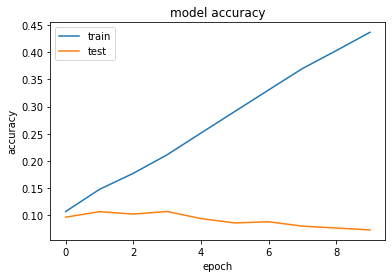

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

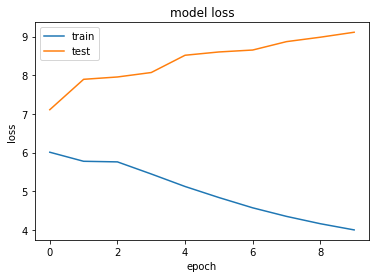

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x
prepare_input("It is not a lack".lower())

it
is
not
a
lack


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [ ]:
def predict_completions(text, n=3):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

In [ ]:
q =  "There is nothing more deceptive than an obvious fact"
print("correct sentence: ",q)
seq = " ".join(tokenizer.tokenize(q.lower())[0:5])
print("Sequence: ",seq)
print("next possible words: ", predict_completions(seq, 5))

correct sentence:  There is nothing more deceptive than an obvious fact
Sequence:  there is nothing more deceptive
there
is
nothing
more
deceptive
next possible words:  ['than', 'a', 'said', 'other', 'if']
